# Sujet 2 : le pouvoir d'achat des ouvriers anglais du XVIe au XIXe siècle

William Playfair était un des pionniers de la présentation graphique des données. Il est notamment considéré comme l'inventeur de l'histogramme. [Un de ses graphes célèbres](https://fr.wikipedia.org/wiki/William_Playfair#/media/File:Chart_Showing_at_One_View_the_Price_of_the_Quarter_of_Wheat,_and_Wages_of_Labour_by_the_Week,_from_1565_to_1821.png), tiré de son livre *A Letter on Our Agricultural Distresses, Their Causes and Remedies*, montre l'évolution du prix du blé et du salaire moyen entre 1565 et 1821. Playfair n'a pas publié les données numériques brutes qu'il a utilisées, car à son époque la réplicabilité n'était pas encore considérée comme essentielle. Des valeurs obtenues par numérisation du graphe sont aujourd'hui téléchargeables, [la version en format CSV](https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv) étant la plus pratique.

Nous commeçons par importer les librairies qui nous seront utiles par la suite.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import urllib.request

## Téléchargement et traitement des données

Si nous ne disposons pas déjà du fichier csv, nous le téléchargeons à l'aide de l'URL. Si nous l'avons déjà, nous utilisons le fichier local.

In [2]:
data_url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv"
data_file = "Wheat.csv"

if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

raw_data = pd.read_csv(data_file)
print(f"Le jeu de données comporte {len(raw_data)} lignes.")
raw_data

Le jeu de données comporte 53 lignes.


rownames  Year  Wheat  Wages
0          1  1565   41.0   5.00
1          2  1570   45.0   5.05
2          3  1575   42.0   5.08
3          4  1580   49.0   5.12
4          5  1585   41.5   5.15
5          6  1590   47.0   5.25
6          7  1595   64.0   5.54
7          8  1600   27.0   5.61
8          9  1605   33.0   5.69
9         10  1610   32.0   5.78
10        11  1615   33.0   5.94
11        12  1620   35.0   6.01
12        13  1625   33.0   6.12
13        14  1630   45.0   6.22
14        15  1635   33.0   6.30
15        16  1640   39.0   6.37
16        17  1645   53.0   6.45
17        18  1650   42.0   6.50
18        19  1655   40.5   6.60
19        20  1660   46.5   6.75
20        21  1665   32.0   6.80
21        22  1670   37.0   6.90
22        23  1675   43.0   7.00
23        24  1680   35.0   7.30
24        25  1685   27.0   7.60
25        26  1690   40.0   8.00
26        27  1695   50.0   8.50
27        28  1700   30.0   9.00
28        29  1705   32.0  10.00
29        30  1710   44.0  11.00
30        31  1715   33.0  11.75
31        32  1720   29.0  12.50
32        33  1725   39.0  13.00
33        34  1730   26.0  13.30
34        35  1735   32.0  13.60
35        36  1740   27.0  14.00
36        37  1745   27.5  14.50
37        38  1750   31.0  15.00
38        39  1755   35.5  15.70
39        40  1760   31.0  16.50
40        41  1765   43.0  17.60
41        42  1770   47.0  18.50
42        43  1775   44.0  19.50
43        44  1780   46.0  21.00
44        45  1785   42.0  23.00
45        46  1790   47.5  25.50
46        47  1795   76.0  27.50
47        48  1800   79.0  28.50
48        49  1805   81.0  29.50
49        50  1810   99.0  30.00
50        51  1815   78.0    NaN
51        52  1820   54.0    NaN
52        53  1821   54.0    NaN

Nous regardons si des données sont manquantes dans le jeu de données (ce que l'on voit directement dans la sortie de la cellule ci-dessus...).

In [3]:
raw_data[raw_data.isnull().any(axis=1)]

rownames  Year  Wheat  Wages
50        51  1815   78.0    NaN
51        52  1820   54.0    NaN
52        53  1821   54.0    NaN

Les "wages" sont manquants pour trois années (1815, 1820 et 1821). Nous supprimons donc les trois lignes correspondantes.

In [4]:
data = raw_data.dropna().copy()
print(f"Le jeu de données comporte {len(data)} lignes.")
data

Le jeu de données comporte 50 lignes.


rownames  Year  Wheat  Wages
0          1  1565   41.0   5.00
1          2  1570   45.0   5.05
2          3  1575   42.0   5.08
3          4  1580   49.0   5.12
4          5  1585   41.5   5.15
5          6  1590   47.0   5.25
6          7  1595   64.0   5.54
7          8  1600   27.0   5.61
8          9  1605   33.0   5.69
9         10  1610   32.0   5.78
10        11  1615   33.0   5.94
11        12  1620   35.0   6.01
12        13  1625   33.0   6.12
13        14  1630   45.0   6.22
14        15  1635   33.0   6.30
15        16  1640   39.0   6.37
16        17  1645   53.0   6.45
17        18  1650   42.0   6.50
18        19  1655   40.5   6.60
19        20  1660   46.5   6.75
20        21  1665   32.0   6.80
21        22  1670   37.0   6.90
22        23  1675   43.0   7.00
23        24  1680   35.0   7.30
24        25  1685   27.0   7.60
25        26  1690   40.0   8.00
26        27  1695   50.0   8.50
27        28  1700   30.0   9.00
28        29  1705   32.0  10.00
29        30  1710   44.0  11.00
30        31  1715   33.0  11.75
31        32  1720   29.0  12.50
32        33  1725   39.0  13.00
33        34  1730   26.0  13.30
34        35  1735   32.0  13.60
35        36  1740   27.0  14.00
36        37  1745   27.5  14.50
37        38  1750   31.0  15.00
38        39  1755   35.5  15.70
39        40  1760   31.0  16.50
40        41  1765   43.0  17.60
41        42  1770   47.0  18.50
42        43  1775   44.0  19.50
43        44  1780   46.0  21.00
44        45  1785   42.0  23.00
45        46  1790   47.5  25.50
46        47  1795   76.0  27.50
47        48  1800   79.0  28.50
48        49  1805   81.0  29.50
49        50  1810   99.0  30.00

## Reproduction du graphe de Playfair

Nous cherchons désormais à reproduire le graphe de Playfair à partir des données numériques.

Nous commençons par représenter, comme Playfair, le prix du blé par des barres et les salaires par une surface bleue délimitée par une courbe rouge.

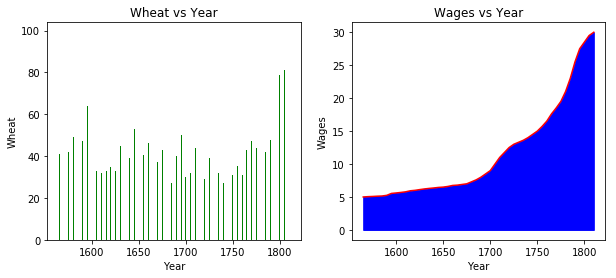

In [5]:
plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
plt.bar(data['Year'], data['Wheat'], color = "green")
plt.ylabel('Wheat')
plt.xlabel('Year')
plt.title("Wheat vs Year")

plt.subplot(1, 2, 2)
plt.plot( data['Year'],data['Wages'], 'r-')
plt.fill_between(data['Year'],data['Wages'], color = 'blue')
plt.ylabel('Wages')
plt.xlabel('Year')
plt.title("Wages vs Year")

plt.show()

Nous pouvons superposer les deux de la même façon dans un seul graphique.

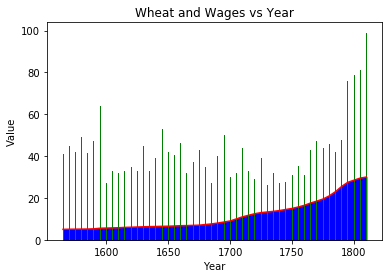

In [6]:
plt.bar(data['Year'], data['Wheat'], color = "green", label = "Wheat")

plt.plot(data['Year'],data['Wages'], 'r-', label = "Wages")
plt.fill_between(data['Year'], data['Wages'], color = 'blue')

plt.ylabel('Value')
plt.xlabel('Year')

plt.title("Wheat and Wages vs Year")
plt.show()

## Amélioration de la présentation

Playfair a combiné les deux quantités dans un même graphique en simplifiant les unités "shillings par quart de boisseau de blé" et "shillings par semaine" à un simple "shillings", ce qui aujourd'hui n'est plus admissible. Nous utilisons donc deux ordonnées différentes, une à gauche et une à droite, en indiquant les unités correctes.

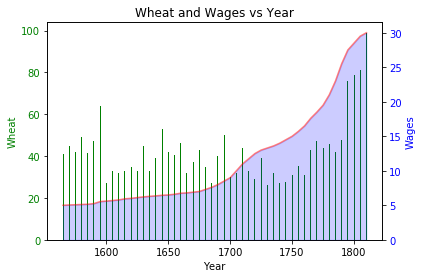

In [7]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Year")
ax1.set_ylabel("Wheat", color="green")
ax1.bar(data['Year'], data['Wheat'], color="green")
ax1.tick_params(axis='y', labelcolor="green")
ax1.set_ylim(bottom=0)  # force Wheat axis to start at 0

ax2.set_ylabel("Wages", color="blue")
ax2.plot(data['Year'], data['Wages'], 'r-', label="Wages", alpha=0.5)
ax2.fill_between(data['Year'], data['Wages'], color='blue', alpha=0.2)
ax2.tick_params(axis='y', labelcolor="blue")
ax2.set_ylim(bottom=0)  # force Wages axis to start at 0

plt.title("Wheat and Wages vs Year")
plt.show()

Nous pouvons également changer le style du graphique, en traçant directement les deux courbes.

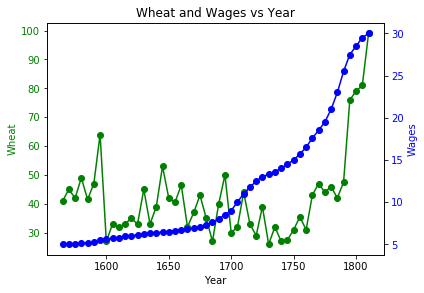

In [8]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Year")
ax1.set_ylabel("Wheat", color = "green")
ax1.plot(data['Year'], data['Wheat'], color = "green", marker = "o")
ax1.tick_params(axis = 'y', labelcolor = "green")

ax2.set_ylabel('Wages', color = "blue")
ax2.plot(data['Year'], data['Wages'], color = "blue", marker = "o")
ax2.tick_params(axis = 'y', labelcolor = "blue")

fig.tight_layout()
plt.title("Wheat and Wages vs Year")
plt.show()

## Pouvoir d'achat

L'objectif de Playfair était de montrer que le pouvoir d'achat des ouvriers avait augmenté au cours du temps. Nous allons essayer de mieux faire ressortir cette information, en représentantle pouvoir d'achat au cours du temps.

Précisons que le pouvoir d'achat est défini comme la quantité de blé qu'un ouvrier peut acheter avec son salaire hebdomadaire.

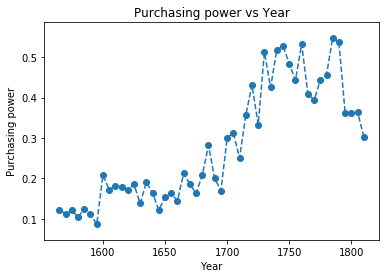

In [9]:
purchasingPower = data['Wages'] / data['Wheat']
plt.scatter(data['Year'], purchasingPower)
plt.plot(data['Year'], purchasingPower, linestyle = "--")
plt.ylabel('Purchasing power')
plt.xlabel('Year')
plt.title("Purchasing power vs Year")
plt.show()

Nous voyons dont que le pouvoir d'achat a tendance à monter jusqu'en 1730 environ, avant d'osciler, et semble-t-il, de diminuer aux alentours de 1800.

Dans un autre graphique, nous représentons le prix du blé et le salaire sur deux axes différents, **sans l'axe du temps**.

Nous proposons deux moyens d'indiquer la progression du temps dans ce graphique:
- En utilisant un dégradé de couleurs pour indiquer le temps
- En écrivant sur chaque point l'année correspondante (ce qui peut vite devenir peu lisible)

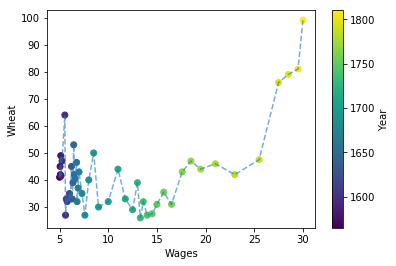

In [10]:
fig, ax = plt.subplots()

sc = ax.scatter(data['Wages'], data['Wheat'], c = data['Year'])

ax.plot(data['Wages'], data['Wheat'], linestyle = '--', alpha = 0.6)

ax.set_xlabel("Wages")
ax.set_ylabel("Wheat")

cbar = plt.colorbar(sc, ax = ax)
cbar.set_label("Year")

plt.show()

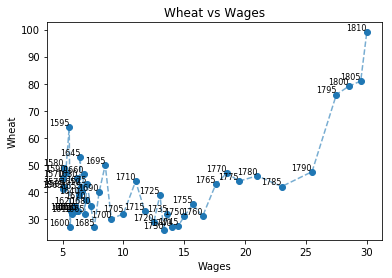

In [11]:
fig, ax = plt.subplots()

sc = ax.scatter(data['Wages'], data['Wheat'])
ax.plot(data['Wages'], data['Wheat'], linestyle='--', alpha=0.6)

for i, year in enumerate(data['Year']):
    ax.text(data['Wages'].iloc[i], data['Wheat'].iloc[i], str(year), fontsize = 8, ha = 'right', va = 'bottom')

ax.set_xlabel("Wages")
ax.set_ylabel("Wheat")

plt.title("Wheat vs Wages")
plt.show()

Selon moi, les deux graphes précédents (où le temps n'est pas un des axes) sont sympathiques, mais ne sont pas les plus lisibles.

Le graphe ci-dessous a le mérite d'être clair, mais ne permet pas de voir exactement comment le pouvoir d'achat évolue.

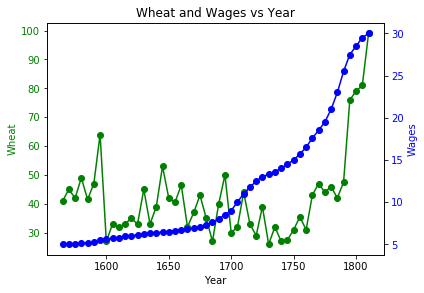

In [12]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Year")
ax1.set_ylabel("Wheat", color = "green")
ax1.plot(data['Year'], data['Wheat'], color = "green", marker = "o")
ax1.tick_params(axis = 'y', labelcolor = "green")

ax2.set_ylabel('Wages', color = "blue")
ax2.plot(data['Year'], data['Wages'], color = "blue", marker = "o")
ax2.tick_params(axis = 'y', labelcolor = "blue")

fig.tight_layout()
plt.title("Wheat and Wages vs Year")
plt.show()

Le graphe suivant montre bien l'évolution du pouvoir d'achat. Si toutefois nous sommes intéressés par l'évolution à la fois des salaires et du prix du blé, alors mieux vaut conserver le graphe précédent.

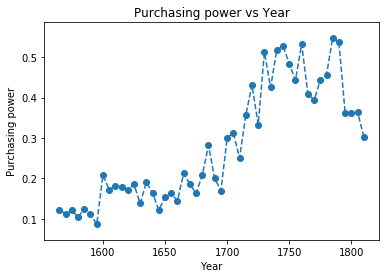

In [13]:
purchasingPower = data['Wages'] / data['Wheat']
plt.scatter(data['Year'], purchasingPower)
plt.plot(data['Year'], purchasingPower, linestyle = "--")
plt.ylabel('Purchasing power')
plt.xlabel('Year')
plt.title("Purchasing power vs Year")
plt.show()